### IMPORT LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from scipy import stats
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression

### LOAD DATA

In [4]:
data = pd.read_csv("Data/train.csv")

In [5]:
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [6]:
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


### MISSING VALUES

In [7]:
miss_data = pd.DataFrame(round(data.isna().sum()/len(data)*100,2))
miss_data['Column'] = miss_data.index
miss_data.columns = ['Missing Value %', 'Column']
miss_data = miss_data[["Column","Missing Value %"]]
miss_data = miss_data.sort_values(['Missing Value %'], ascending=False)
miss_data = miss_data.reset_index(drop=True)
miss_data

,Column,Missing Value %
0,ID_code,0.0
1,var_136,0.0
2,var_126,0.0
3,var_127,0.0
4,var_128,0.0
5,var_129,0.0
6,var_130,0.0
7,var_131,0.0
8,var_132,0.0
9,var_133,0.0


In [8]:
miss_data[miss_data['Missing Value %']>0]

,Column,Missing Value %


**Observation : No missing values**

### CORRELATION

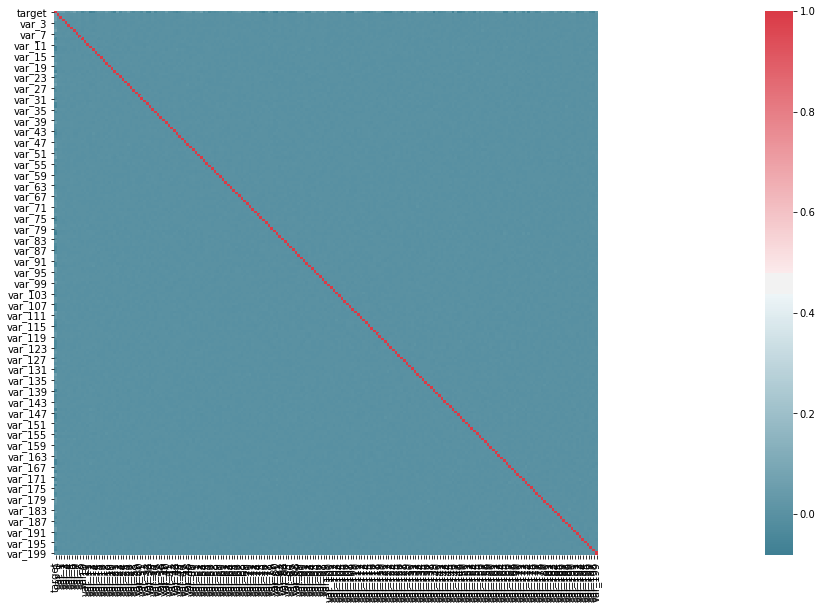

In [9]:
f, ax = plt.subplots(figsize=(60, 10))
corr = data.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

**Observation: No correlated variables** 

### CLASS DISTRIBUTION

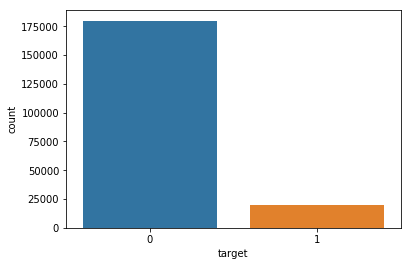

In [10]:
 sns.countplot(x="target", data=data)

**Target classes are unbalanced.**

### OUTLIER DETECTION

In [11]:
cols = [x for x in list(data.columns) if x not in['ID_code','target']]
data[(np.abs(stats.zscore(data[cols])) > 3).all(axis=1)]

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199


**Observation: No Outliers**

### Relationship with Target

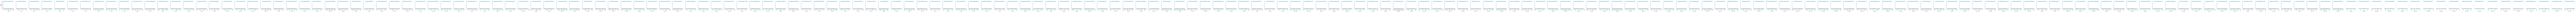

In [12]:
rp = sns.pairplot(data=data,
                  y_vars=['target'],
                  x_vars=cols)

### FEATURE SELECTION

In [13]:
rf = RandomForestClassifier(random_state=42)
model = rf.fit(data[cols],data['target'])
sorted_features = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), cols), 
             reverse=False)
x, y = zip(*sorted_features)

plot_data = [go.Bar(
            x=x,
            y=y,
            orientation = 'h'
    )]

iplot(plot_data, filename='basic-bar')

In [14]:
# selected_features = [s[1] for s in sorted_features if s[0] > 0.008]
selected_features = sorted_features

### SAMPLING AND MODEL

#### Balance Data by Sampling

In [15]:
def sample_data(data):
    zero_data = data[data['target']==0].sample(n=len(data[data['target']==1]))
    one_data = data[data['target']==1]
    con_data = pd.concat([zero_data, one_data])
    final_data = con_data.sample(frac=1).reset_index(drop=True)
    return final_data

In [16]:
features = [s[1] for s in sorted_features]
final_data = sample_data(data)
X_train, X_val, y_train, y_val = train_test_split(final_data[features], final_data[['target']], test_size=0.2, random_state=12,stratify=final_data[['target']])

#### Build Linear Model

In [17]:
def build_linear_model(X_train, y_train, X_val, y_val):
    lf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr').fit(X_train, y_train)
    print(classification_report(y_val, pd.DataFrame(lf.predict(X_val)), target_names=['0','1']))
    return lf

lf = build_linear_model(X_train, y_train, X_val, y_val)

             precision    recall  f1-score   support

          0       0.78      0.77      0.78      4020
          1       0.77      0.78      0.78      4020

avg / total       0.78      0.78      0.78      8040



#### Build RF Model

In [18]:
def build_rf_model(X_train, y_train, X_val, y_val):
    rf = RandomForestClassifier(random_state=42)
    rf_model = rf.fit(X_train,y_train)
    print(classification_report(y_val, pd.DataFrame(rf_model.predict(X_val)), target_names=['0','1']))
    return rf

rf = build_rf_model(X_train, y_train, X_val, y_val)

             precision    recall  f1-score   support

          0       0.62      0.74      0.67      4020
          1       0.68      0.55      0.60      4020

avg / total       0.65      0.64      0.64      8040



#### Build Ensemble

In [19]:
def build_model(X_train, y_train,selected_features):
    X_train = X_train[selected_features]
    X_train = np.array(X_train).reshape(-1, 1)
    y_train = np.array(y_train).reshape(-1, 1)
    rf = RandomForestClassifier()
    rf_model = rf.fit(X_train,y_train)
    return rf_model

In [20]:
def build_ensemble(X_train, y_train, X_val, y_val, features):
    models = []

    for f in features:
        models.append(build_model(X_train, y_train,f))

    estimators = []
    for m,f in zip(models,features):
        estimators.append((f,m))
    en = VotingClassifier(estimators=estimators, voting='hard')
    en = en.fit(X_val, y_val)
    pred = en.predict(X_val)
    print(classification_report(y_val, pd.DataFrame(pred), target_names=['0','1']))
    return en

en = build_ensemble(X_train, y_train, X_val, y_val, features)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      4020
          1       1.00      1.00      1.00      4020

avg / total       1.00      1.00      1.00      8040



### Cross-Validation

In [21]:
for k in range(10):
    print("\n\n################### "+str(k)+" Fold ###################")
    X_train, X_val, y_train, y_val = train_test_split(final_data[features], final_data[['target']], test_size=0.2, stratify=final_data[['target']])
    print("LINEAR MODEL")
    build_linear_model(X_train, y_train, X_val, y_val)
    print("RANDOM FOREST MODEL")
    build_rf_model(X_train, y_train, X_val, y_val)
    print("ENSEMBLE MODEL")
    build_ensemble(X_train, y_train, X_val, y_val, features)



################### 0 Fold ###################
LINEAR MODEL
             precision    recall  f1-score   support

          0       0.77      0.76      0.76      4020
          1       0.76      0.77      0.76      4020

avg / total       0.76      0.76      0.76      8040

RANDOM FOREST MODEL
             precision    recall  f1-score   support

          0       0.62      0.74      0.68      4020
          1       0.68      0.55      0.61      4020

avg / total       0.65      0.64      0.64      8040

ENSEMBLE MODEL
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      4020
          1       1.00      1.00      1.00      4020

avg / total       1.00      1.00      1.00      8040



################### 1 Fold ###################
LINEAR MODEL
             precision    recall  f1-score   support

          0       0.76      0.76      0.76      4020
          1       0.76      0.77      0.76      4020

avg / total       0.76      0.76   